In [ ]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
trainFile = 'train.tsv'
testFile = 'test.tsv'
valFile = 'valid.tsv'

In [ ]:
traindata = pd.read_csv(trainFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
traindata.name = 'Training Data'

testdata = pd.read_csv(testFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
testdata.name = 'Testing Data'

valdata = pd.read_csv(valFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
valdata.name = 'Validation Data'

In [ ]:
print(traindata.shape)
print(testdata.shape)
print(valdata.shape)

(10240, 14)
(1267, 14)
(1284, 14)


In [ ]:
from nltk.corpus import stopwords
import string
def process_text(s):
    #removes punctuation from strings and joins adjacent strings tgt
    nopunc = [char for char in s if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #lowercase all strings
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
traindata['Clean Statements'] = traindata['statement'].apply(process_text)
testdata['Clean Statements'] = testdata['statement'].apply(process_text)
valdata['Clean Statements'] = valdata['statement'].apply(process_text)
traindata.sample(5)

,json ID,label,statement,subject,speaker,job title,state,party,barely true,false,half true,mostly true,pants on fire,los,Clean Statements
9336,3924.json,half-true,Workers who pick produce in Georgias fields ca...,immigration,gary-black,Commissioner of Agriculture,Georgia,republican,0.0,0.0,1.0,1.0,0.0,Interview,"[Workers, pick, produce, Georgias, fields, mak..."
174,5288.json,half-true,"Says New Jersey is down nearly 200,000 jobs fr...","economy,job-accomplishments,jobs",one-new-jersey,NaN,NaN,democrat,0.0,0.0,1.0,2.0,0.0,an article posted on One New Jersey’s website,"[Says, New, Jersey, nearly, 200000, jobs, prer..."
9700,3382.json,true,Hitler didnt want unions. Stalin didnt want un...,"jobs,labor,message-machine",sherrod-brown,U.S. Senator,Ohio,democrat,3.0,4.0,5.0,8.0,1.0,a speech in the Senate,"[Hitler, didnt, want, unions, Stalin, didnt, w..."
7130,8524.json,mostly-true,Says Rick Scott cut education by $1.3 billion ...,"education,state-budget,stimulus",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on MSNBC,"[Says, Rick, Scott, cut, education, 13, billio..."
1069,3760.json,true,You cant give a child an aspirin in school wit...,"abortion,health-care",steve-oelrich,State senator,Florida,republican,0.0,0.0,0.0,0.0,0.0,"floor debate on May 5, 2011","[cant, give, child, aspirin, school, without, ..."


In [ ]:
traindata.head()

,json ID,label,statement,subject,speaker,job title,state,party,barely true,false,half true,mostly true,pants on fire,los,Clean Statements
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,"[Says, Annies, List, political, group, support..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"[decline, coal, start, started, natural, gas, ..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,"[Hillary, Clinton, agrees, John, McCain, votin..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,"[Health, care, reform, legislation, likely, ma..."
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"[economic, turnaround, started, end, term]"


In [ ]:
def plot_save_wordcloud(dataset, title):
    if not os.path.isdir('./figures'):
        os.makedirs('figures')

    text = dataset['Clean Statements'].values
    wordcloud = WordCloud(
        width=3000, height=2000, background_color='white',
        stopwords=STOPWORDS).generate(str(text))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('{}'.format(title))
    title = title.replace(' ', '_')
    plt.savefig('./figures/word_cloud_' + title)
    plt.show()

In [ ]:
def create_word_cloud(dataset, dataset_name):
    """Function to create the wordcloud of the complete dataset as well as
    for only the true labels as well as for false labels of the dataset.

    Parameters:
    -----------
    dataset: pandas dataframe
        The dataset whose wordcloud is to be formed.
    dataset_name: string
        The name of the dataset.
    """
    title = 'The wordcloud of the complete ' + dataset_name
    plot_save_wordcloud(dataset, title)

    # Plotting the wordcloud for the true labels only
    true_dataset = dataset[dataset['label'].astype(str) == 'true']
    title = 'The wordcloud of the true labels of ' + dataset_name
    plot_save_wordcloud(true_dataset, title)

    # Plotting the wordcloud for the half-true labels only
    half_true_dataset = dataset[dataset['label'].astype(str) == 'half-true']
    title = 'The wordcloud of the half-true labels of ' + dataset_name
    plot_save_wordcloud(half_true_dataset, title)

    # Plotting the wordcloud for the mostly-true labels only
    mostly_true_dataset = dataset[dataset['label'].astype(str) == 'mostly-true']
    title = 'The wordcloud of the mostly-true labels of ' + dataset_name
    plot_save_wordcloud(mostly_true_dataset, title)

    # Plotting the wordcloud for the barely-true labels only
    barely_true_dataset = dataset[dataset['label'].astype(str) == 'barely-true']
    title = 'The wordcloud of the barely-true labels of ' + dataset_name
    plot_save_wordcloud(barely_true_dataset, title)

    # Plotting the wordcloud for the false labels only
    false_dataset = dataset[dataset['label'].astype(str) == 'false']
    title = 'The wordcloud of the false labels of ' + dataset_name
    plot_save_wordcloud(false_dataset, title)

    # Plotting the wordcloud for the pants-fire labels only
    pants_fire_dataset = dataset[dataset['label'].astype(str) == 'pants-fire']
    title = 'The wordcloud of the pants-fire labels of ' + dataset_name
    plot_save_wordcloud(pants_fire_dataset, title)

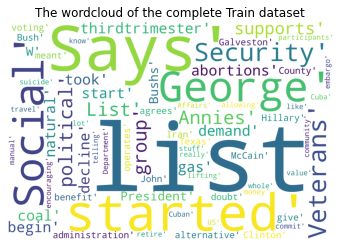

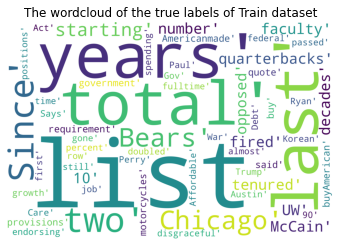

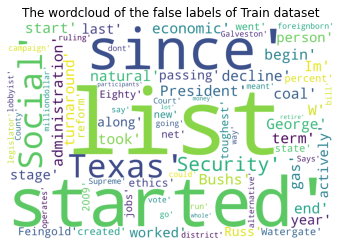

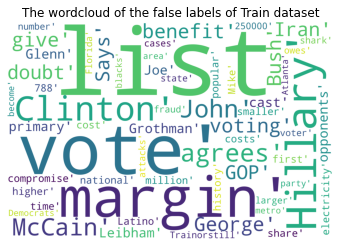

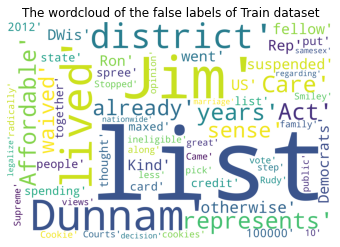

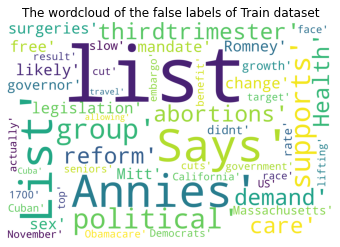

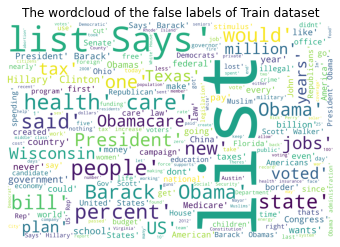

In [ ]:
create_word_cloud(traindata, 'Train dataset')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
countV = CountVectorizer()
trainset = pd.concat([traindata], ignore_index = True)
# train_count = countV.fit_transform(traindata['Clean Statements'].values)

In [ ]:
# print(countV)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [ ]:
def process_text(s):
    #removes punctuation from strings and joins adjacent strings tgt
    nopunc = [char for char in s if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #lowercase all strings
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [ ]:
nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(analyzer = process_text, lowercase=True, ngram_range=(1, 4))),
    ('nb_clf', MultinomialNB(alpha=6.8))
])
nb_pipeline.fit(traindata['Clean Statements'], traindata['label'])
prediction = nb_pipeline.predict(testdata)

In [ ]:
print(traindata['label'].shape)
print(prediction.shape)
print(prediction)
print(testdata.shape)

(10240,)
(14,)
['half-true' 'half-true' 'half-true' 'half-true' 'half-true' 'half-true'
 'half-true' 'half-true' 'half-true' 'half-true' 'half-true' 'half-true'
 'half-true' 'half-true']
(1267, 14)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score)

y_pred = nb_pipeline.predict(testdata['Clean Statements'])
y_true = testdata['label']
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average = 'weighted')
precision = precision_score(y_true, y_pred, average = 'weighted')
recall = recall_score(y_true, y_pred, average = 'weighted')
accuracy = accuracy_score(y_true, y_pred)
    
print('Report for ---> {}'.format("MNB Vectorizer"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))

Report for ---> MNB Vectorizer
Accuracy is: 0.2107340173638516
F1 score is: 0.07693434804119433
Precision score is: 0.1911143835757686
Recall score is: 0.2107340173638516


In [ ]:
from sklearn import preprocessing
def transformtoBinary(s):
  news = "a"
  if s == 'half-true' or s == 'barely-true' or s== 'true' or s == 'mostly-true':
    news = 'true'
  else:
    news = 'false'
  return news
traindata['bilabel'] = traindata['label'].apply(transformtoBinary)
testdata['bilabel'] = traindata['label'].apply(transformtoBinary)


In [ ]:
nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(analyzer = process_text, lowercase=True, ngram_range=(1, 4))),
    ('nb_clf', MultinomialNB(alpha=6.8))
])
nb_pipeline.fit(traindata['Clean Statements'], traindata['bilabel'])

Pipeline(memory=None,
         steps=[('nb_CV',
                 CountVectorizer(analyzer=<function process_text at 0x7f763f15bb90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 4), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=6.8, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
y_pred = nb_pipeline.predict(testdata['Clean Statements'])
y_true = testdata['bilabel']
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average = 'weighted')
precision = precision_score(y_true, y_pred, average = 'weighted')
recall = recall_score(y_true, y_pred, average = 'weighted')
accuracy = accuracy_score(y_true, y_pred)
    
print('Report for ---> {}'.format("MNB Vectorizer - Binary Classfication"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))

Report for ---> MNB Vectorizer - Binary Classfication
Accuracy is: 0.712707182320442
F1 score is: 0.593156300124755
Precision score is: 0.5079515277311437
Recall score is: 0.712707182320442
